In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.7 MB/s eta 0:00:00


In [ ]:
import praw
import time
import re
import nltk
import os
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from collections import Counter
from wordcloud import WordCloud
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # Remove stop words and apply stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(text)

# Check if NLTK resources are available
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Create a Reddit instance
reddit = praw.Reddit(
    client_id="wzx3QK7ygFrKPSQeXhzeWQ",
    client_secret="_aZlEAeqVWeVpZTW7Rjr40YCXjIAhA",
    user_agent="my user agent"
)

# Define the search term
search_term = "Battery Electric Vehicle or BEV|Tesla Model 3|Chevrolet Bolt|Nissan Leaf|Electric Vehicle|EV"

# Collect relevant posts from the subreddit "all"
posts = reddit.subreddit("all").search(search_term, limit=1000)

# Initialize lists to store data
data = []
timestamps = []

# Iterate over the posts
for post in posts:
    try:
        # Add post title to data list
        data.append(post.title)
        # Add post timestamp to timestamps list
        timestamps.append(post.created_utc)
        # Add post comments to data list
        post.comments.replace_more(limit=5)
        for comment in post.comments.list():
            data.append(comment.body)
            # Add comment timestamp to timestamps list
            timestamps.append(comment.created_utc)
        time.sleep(2)  # Sleep to respect Reddit's rate limits
    except Exception as e:
        print(f"Error processing post: {e}")

# Preprocess the data
data_preprocessed = [preprocess_text(text) for text in data]

# Create a DataFrame to store the preprocessed data
df = pd.DataFrame({"Text": data_preprocessed, "Timestamp": timestamps})

# Export the preprocessed data to a CSV file
df.to_csv('reddit_data.csv', index=False)

# Print the first 5 elements of data_preprocessed to show the final dataset
print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environment

                                                Text     Timestamp
0  nissan reus batteri old leaf electr vehicl mak...  1.693564e+09
1  would love buy someth like wonder recharg look...  1.693565e+09
2  add two cent someon get new batteri old leaf 2...  1.693567e+09
3  told nissan dealer would cost 19k dealership r...  1.693580e+09
4  nissan sourc older batteri older leaf use beat...  1.693569e+09


In [2]:
# Count the frequency of each word
word_counts = Counter(" ".join(df["Text"]).split())

# Display the 10 most common words
print(word_counts.most_common(10))


NameError: name 'Counter' is not defined

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


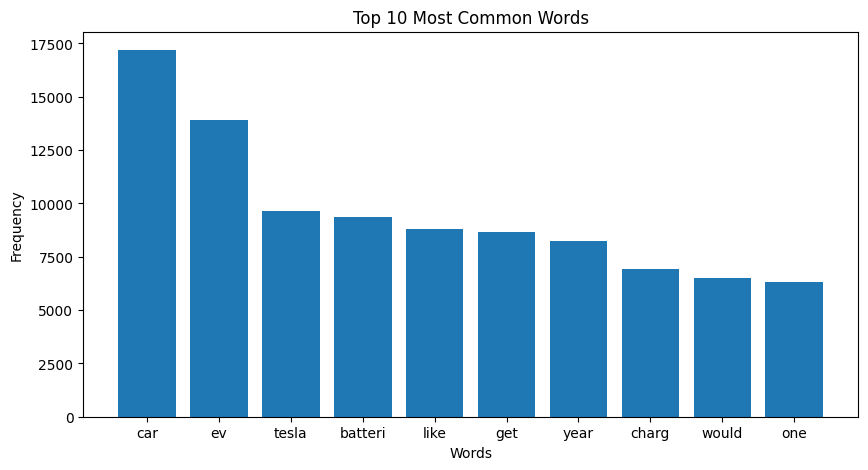

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each word
word_counts = Counter(" ".join(df["Text"]).split())

# Get the 10 most common words
common_words = word_counts.most_common(10)

# Separate the words and their counts
words, counts = zip(*common_words)

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


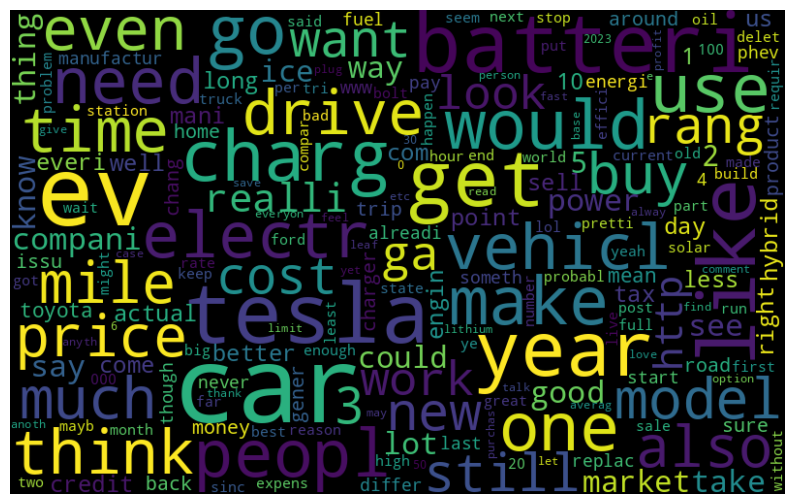

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


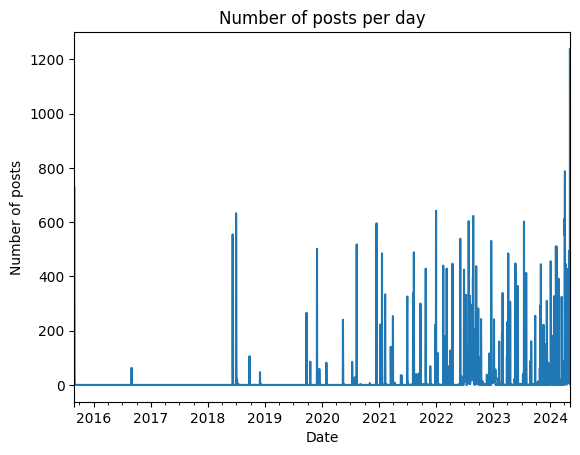

In [ ]:
# Convert the timestamps to datetime objects
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s')

# Resample the DataFrame to get the number of posts per day
posts_per_day = df.resample('D', on='Timestamp').size()

# Plot the time series data
posts_per_day.plot()
plt.title('Number of posts per day')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.show()


In [ ]:
posts_per_day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp
2015-08-30     729
2015-08-31      66
2015-09-01       5
2015-09-02       0
2015-09-03       0
              ... 
2024-05-05       3
2024-05-06    1239
2024-05-07     807
2024-05-08     177
2024-05-09      30
Freq: D, Length: 3176, dtype: int64

In [ ]:
from gensim import corpora, models

# Create a dictionary from the preprocessed data
dictionary = corpora.Dictionary(df['Text'].apply(lambda x: x.split()))

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in df['Text'].apply(lambda x: x.split())]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.084*"year" + 0.031*"batteri" + 0.019*"10" + 0.017*"replac" + 0.017*"tesla"')
(1, '0.031*"car" + 0.026*"ev" + 0.021*"peopl" + 0.019*"like" + 0.012*"one"')
(2, '0.035*"model" + 0.023*"3" + 0.014*"hybrid" + 0.014*"car" + 0.014*"e"')
(3, '0.030*"batteri" + 0.016*"electr" + 0.013*"power" + 0.012*"use" + 0.011*"vehicl"')
(4, '0.025*"tax" + 0.025*"credit" + 0.025*"price" + 0.016*"get" + 0.015*"ev"')
(5, '0.027*"thank" + 0.021*"lol" + 0.019*"read" + 0.017*"post" + 0.017*"know"')
(6, '0.059*"tesla" + 0.021*"ev" + 0.020*"compani" + 0.018*"market" + 0.016*"car"')
(7, '0.109*"http" + 0.076*"com" + 0.062*"www" + 0.029*"r" + 0.025*"reddit"')
(8, '0.025*"like" + 0.021*"get" + 0.021*"look" + 0.017*"one" + 0.017*"bolt"')
(9, '0.029*"charg" + 0.019*"car" + 0.016*"ev" + 0.015*"drive" + 0.014*"get"')


In [ ]:
# Assign each comment to a topic
df['Topic'] = df['Text'].apply(lambda x: dictionary.doc2bow(x.split())).apply(lambda x: max(lda_model.get_document_topics(x), key=lambda tup: tup[1])[0])

# Create a new DataFrame for displaying comments and topics
df_display = df[['Text', 'Topic']]

# Display the DataFrame
print(df_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                    Text  Topic
0      nissan reus batteri old leaf electr vehicl mak...      3
1      would love buy someth like wonder recharg look...      1
2      add two cent someon get new batteri old leaf 2...      0
3      told nissan dealer would cost 19k dealership r...      0
4      nissan sourc older batteri older leaf use beat...      0
...                                                  ...    ...
46711                                       oh see thank      4
46712         good deal cheapest one around 15k 25k rang      4
46713                         hmm car turn accord seller      1
46714                                        ye j1772 ac      9
46715  oh whoop coupl other grand lowest price one qu...      5

[46716 rows x 2 columns]


In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity for each post
df['Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the sentiment polarity of the first ten posts
print(df['Polarity'].head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0.100000
1    0.500000
2   -0.057828
3   -0.150000
4    0.156566
5    0.083333
6    0.000000
7    0.187500
8    0.371429
9    0.000000
Name: Polarity, dtype: float64


In [ ]:
# Print the average sentiment polarity
print(df['Polarity'].mean())

0.07963013749313881


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['Text'].apply(lambda x: x.split()), dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.5687471224149544


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


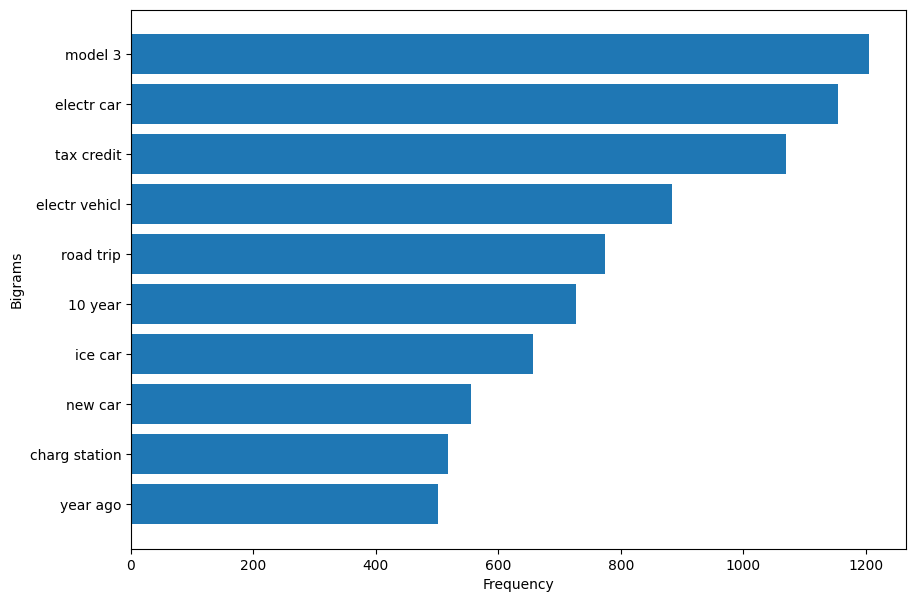

In [ ]:
# Import necessary libraries
import nltk
from nltk.collocations import BigramCollocationFinder
import matplotlib.pyplot as plt

# Drop missing values
df = df.dropna(subset=['Text'])

# Ensure all values in 'Text' column are strings
df['Text'] = df['Text'].astype(str)

# Preprocess 'Text' column to remove 'http' and 'www'
df['Text'] = df['Text'].apply(lambda x: ' '.join(word for word in x.split() if not (word.startswith('http') or word.startswith('www'))))

# Generate a frequency distribution of bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(df['Text'].str.split().sum())
finder.apply_freq_filter(5)
bigram_freq = finder.ngram_fd.items()

# Filter out bigrams containing 'http' or 'www'
bigram_freq = [(bigram, freq) for bigram, freq in bigram_freq if not any(word in bigram for word in ['http', 'www'])]

bigram_freq = sorted(bigram_freq, key=lambda x: -x[1])
bigrams, freq = zip(*bigram_freq)
bigrams = [' '.join(bigram) for bigram in bigrams]

# Plot the 10 most frequent bigrams
plt.figure(figsize=(10, 7))
plt.barh(bigrams[:10], freq[:10])
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


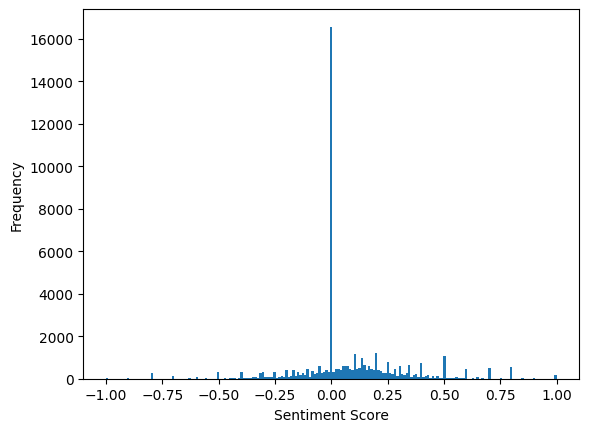

In [ ]:
# Assuming `sentiments` is a list of sentiment scores
sentiments = df['Polarity']
plt.hist(sentiments, bins='auto')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
from collections import Counter

# Count the frequency of each word
word_counts = Counter(" ".join(df["Text"]).split())

# Get the 10 most common words
common_words = word_counts.most_common(10)

# Create a DataFrame from the list of tuples
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the DataFrame
print(df_common_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Word  Frequency
0      car      17189
1       ev      13931
2    tesla       9641
3  batteri       9379
4     like       8816
5      get       8658
6     year       8250
7    charg       6938
8    would       6514
9      one       6299


In [ ]:
import pandas as pd
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Find bigrams in the text
words = " ".join(df["Text"]).split()
bigram_finder = BigramCollocationFinder.from_words(words)

# Define the bigrams you want to exclude
excluded_bigrams = {('http', 'www')}

# Filter out the excluded bigrams
bigram_finder.apply_ngram_filter(lambda w1, w2: (w1, w2) in excluded_bigrams)

# Measure the association between each pair of words in the bigrams
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)

# Get the 10 bigrams with the highest association scores
top_bigrams = sorted(bigram_scores, key=lambda x: -x[1])[:10]

# Create a DataFrame from the list of tuples
df_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Score'])

# Display the DataFrame
print(df_bigrams)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             Bigram     Score
0        (model, 3)  0.001075
1     (electr, car)  0.001030
2     (tax, credit)  0.000955
3  (electr, vehicl)  0.000788
4      (road, trip)  0.000691
5        (10, year)  0.000649
6        (ice, car)  0.000585
7        (new, car)  0.000495
8  (charg, station)  0.000462
9       (year, ago)  0.000448


In [ ]:

from textblob import TextBlob

# Calculate sentiment polarity for each post
df['Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a new column 'Sentiment' that contains 'Positive' if polarity is greater than 0, 'Negative' if less than 0 and 'Neutral' otherwise
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Print the DataFrame with the 'Text', 'Polarity', and 'Sentiment' columns for the first ten posts
print(df[['Text', 'Polarity', 'Sentiment']].head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                Text  Polarity Sentiment
0  nissan reus batteri old leaf electr vehicl mak...  0.100000  Positive
1  would love buy someth like wonder recharg look...  0.500000  Positive
2  add two cent someon get new batteri old leaf 2... -0.057828  Negative
3  told nissan dealer would cost 19k dealership r... -0.150000  Negative
4  nissan sourc older batteri older leaf use beat...  0.156566  Positive
5  use way back leaf first came use domest batter...  0.083333  Positive
6                                    make gonk droid  0.000000   Neutral
7  diyer year make golf cart batteri glad see oth...  0.187500  Positive
8  car batteri longer use drive electr car charg ...  0.371429  Positive
9                        portabl power sourc batteri  0.000000   Neutral


In [ ]:
from textblob import TextBlob
import pandas as pd

# Calculate sentiment polarity for each post
df['Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a new column 'Sentiment' that contains 'Positive' if polarity is greater than 0, 'Negative' if less than 0 and 'Neutral' otherwise
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Create a table with the 'Text', 'Polarity', and 'Sentiment' columns for the first ten posts
table = pd.DataFrame(df[['Text', 'Polarity', 'Sentiment']])

# Print the table
print(table)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                    Text  Polarity Sentiment
0      nissan reus batteri old leaf electr vehicl mak...  0.100000  Positive
1      would love buy someth like wonder recharg look...  0.500000  Positive
2      add two cent someon get new batteri old leaf 2... -0.057828  Negative
3      told nissan dealer would cost 19k dealership r... -0.150000  Negative
4      nissan sourc older batteri older leaf use beat...  0.156566  Positive
...                                                  ...       ...       ...
46711                                       oh see thank  0.000000   Neutral
46712         good deal cheapest one around 15k 25k rang  0.700000  Positive
46713                         hmm car turn accord seller  0.000000   Neutral
46714                                        ye j1772 ac  0.000000   Neutral
46715  oh whoop coupl other grand lowest price one qu...  0.236111  Positive

[46716 rows x 3 columns]


In [ ]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.157004 -0.009859       1        1  21.282619
1      0.142856  0.114662       2        1  16.137882
3      0.125421 -0.039398       3        1  15.193182
6      0.127541  0.055822       4        1  11.987095
4      0.108577 -0.091582       5        1   9.744511
0      0.028840 -0.185463       6        1   8.006919
2     -0.061322 -0.207640       7        1   5.913647
8     -0.025271  0.191513       8        1   4.702660
5     -0.172667  0.249669       9        1   4.271738
7     -0.430979 -0.077726      10        1   2.759747, topic_info=         Term          Freq         Total Category  logprob  loglift
94       year   8894.000000   8894.000000  Default  30.0000  30.0000
160     tesla  10137.000000  10137.000000  Default  29.0000  29.0000
407      http   3399.000000   3399.000000  Default  28.0000  28.0000
0     batteri   8820.000000   8820.000000  Default  27.0000  27.0000
97      charg   7036.000000   7036.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1489     data    199.213792    654.420881  Topic10  -5.0496   2.4007
911    search    130.243558    202.025338  Topic10  -5.4746   3.1510
412      post    162.507788   1051.588056  Topic10  -5.2532   1.7227
2949        c    131.248959    314.991888  Topic10  -5.4669   2.7146
33       list    132.009712    721.773845  Topic10  -5.4611   1.8912

[635 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
971       1  0.268180          0
971       5  0.109300          0
971       7  0.620870          0
2244      1  0.009221        000
2244      5  0.159383        000
...     ...       ...        ...
94        6  0.847923       year
1908      6  0.990684  yesterday
1087     10  0.994808      youtu
116      10  0.997798     youtub
606       2  0.994385        zoe

[1218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 4, 7, 5, 1, 3, 9, 6, 8])

In [ ]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -7.984921395523988


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda_umass = CoherenceModel(model=lda_model, texts=df['Text'].apply(lambda x: x.split()), dictionary=dictionary, coherence="u_mass")
coherence_lda_umass = coherence_model_lda_umass.get_coherence()
print('Coherence Score u_mass: ', coherence_lda_umass)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score u_mass:  -2.8360831658844825


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


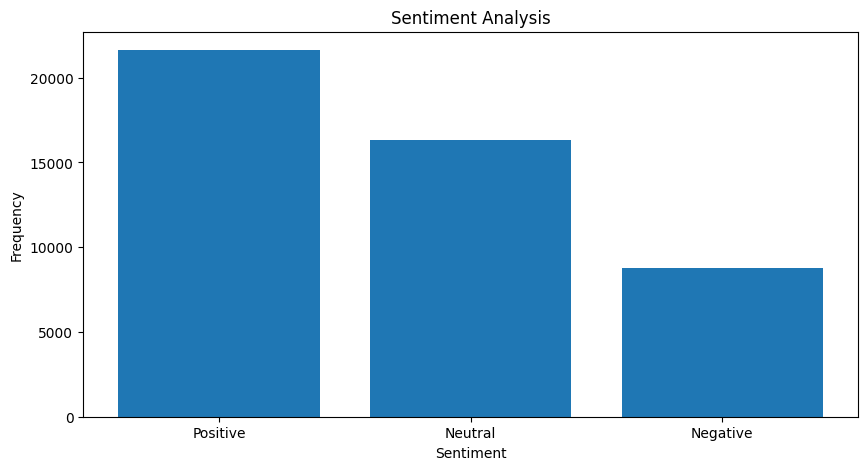

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


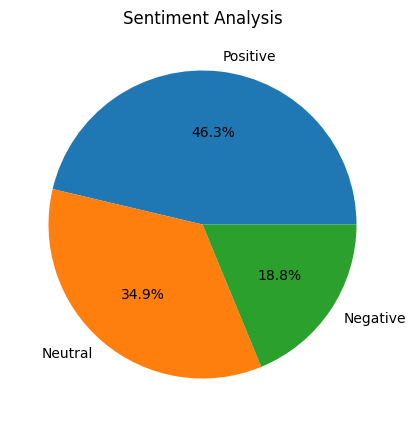

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,5))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


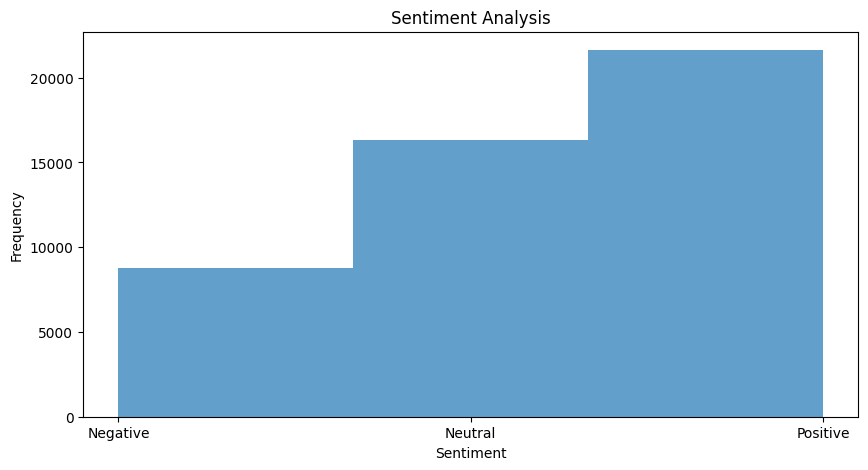

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Sentiment' column to categorical type for numerical processing
df['Sentiment'] = df['Sentiment'].astype('category')
df['Sentiment_Cat'] = df['Sentiment'].cat.codes

# Create a histogram
plt.figure(figsize=(10,5))
plt.hist(df['Sentiment_Cat'], bins=3, alpha=0.7)
plt.title('Sentiment Analysis')
plt.xticks(range(3), df['Sentiment'].cat.categories)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


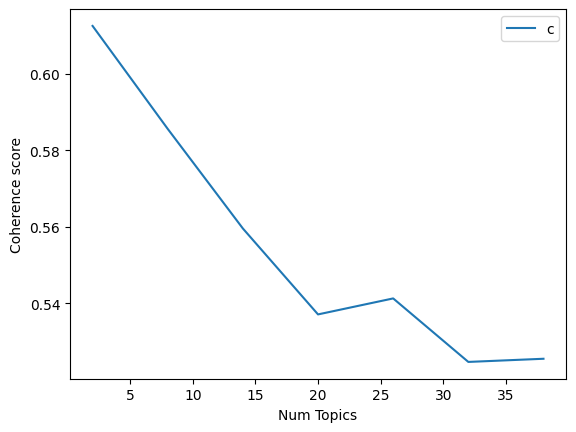

In [ ]:
from gensim.models import LdaMulticore, CoherenceModel
from gensim.corpora import Dictionary

# Assuming that documents is a list of strings i.e. your corpus
texts = [text.split() for text in df['Text']]

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in texts]
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=40, step=6)

# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


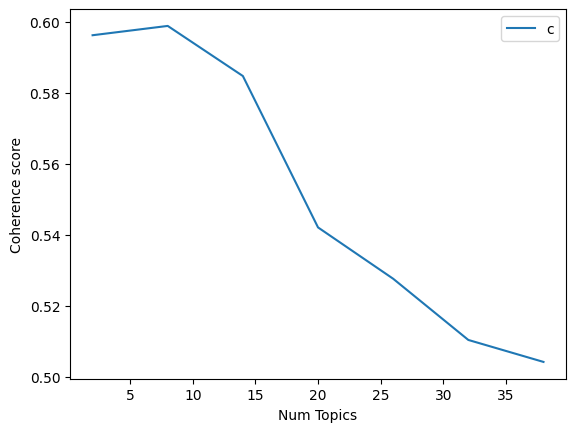

In [ ]:
from gensim.models import LdaMulticore, CoherenceModel
from gensim.corpora import Dictionary

# Assuming that documents is a list of strings i.e. your corpus
texts = [text.split() for text in df['Text']]

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=40, step=6)

# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
from gensim.models import LdaMulticore, CoherenceModel
from gensim.corpora import Dictionary

# Assuming that documents is a list of strings i.e. your corpus
texts = [text.split() for text in df['Text']]

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=40, step=6)

# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


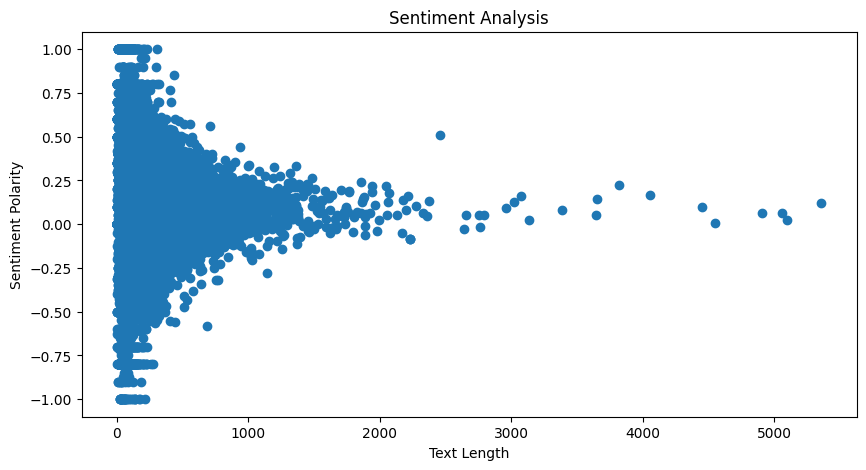

In [ ]:
import matplotlib.pyplot as plt

# Calculate the length of each text
df['Text_Length'] = df['Text'].apply(len)

# Create a scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df['Text_Length'], df['Polarity'])
plt.title('Sentiment Analysis')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Polarity')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10,5))
plt.boxplot(df['Polarity'], vert=False)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Polarity')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' where each row represents a document,
# and you have columns 'word1_freq' and 'word2_freq' representing the frequencies of two words

correlation = df['ev'].corr(df['car'])

print(f"The correlation between the frequencies of word1 and word2 is {correlation}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'ev'

In [ ]:
# Import necessary libraries
from transformers import BertModel, BertTokenizer
import torch
from scipy.spatial.distance import cosine

# Load the pre-trained BERT model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to get the BERT embedding of a word
def calculate_word_embedding(word):
    # Tokenize the word and add special tokens
    encoded_word = tokenizer.encode(word, add_special_tokens=True)
    # Convert to tensor and add batch dimension
    tensor_word = torch.tensor(encoded_word).unsqueeze(0)
    # Get the BERT embeddings
    with torch.no_grad():
        embeddings = model(tensor_word)[0]
    # Return the embedding of the first token as the word embedding
    return embeddings[0][0]

# Calculate embeddings for the words "like" and "ev"
embedding_word1 = calculate_word_embedding("like")
embedding_word2 = calculate_word_embedding("ev")

# Calculate and print the cosine similarity between the two word embeddings
cosine_similarity = 1 - cosine(embedding_word1, embedding_word2)
print(f"Similarity between 'batteri' and 'tesla': {cosine_similarity}")


In [ ]:
from gensim import corpora, models

# assuming `texts` is your corpus and it has been preprocessed
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# initialize an LDA model
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# now you can use `lda`
df = pd.DataFrame(lda.get_document_topics(corpus))


In [ ]:
# Check if corpus is empty
if not corpus:
    print("Corpus is empty")

# Check if lda model is trained
if not lda.is_fitted:
    print("LDA model is not trained")

# Try to print topics of a document
for index, score in sorted(lda[corpus[0]], key=lambda tup: -1*tup[1]):
    print(f"Score: {score}\t Topic: {lda.print_topic(index, 5)}")


In [ ]:
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


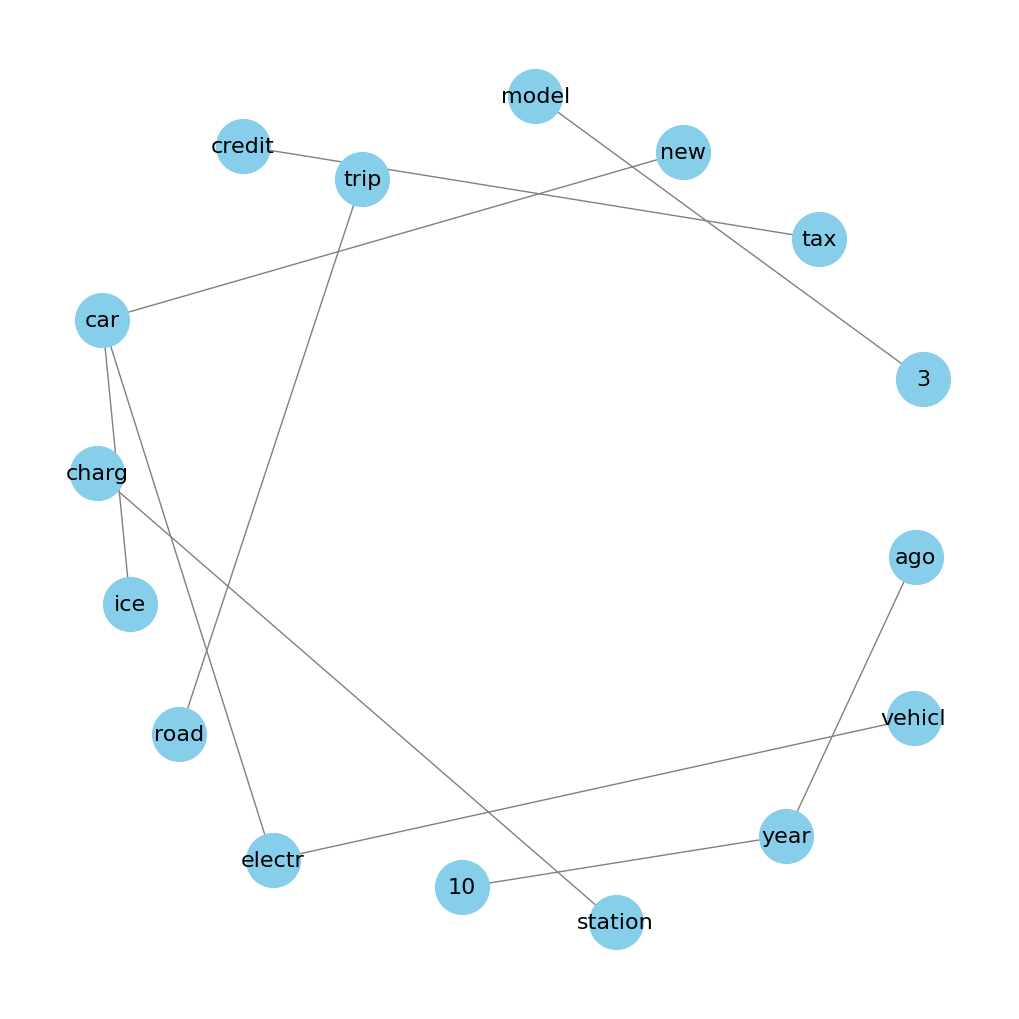

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new network graph
G = nx.Graph()

# Add edges to the graph (we use the bigram as the edge and the score as the weight)
for index, row in df_bigrams.iterrows():
    G.add_edge(row['Bigram'][0], row['Bigram'][1], weight=row['Score'])

# Draw the graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes, you might want to fix the seed for consistent layout
nx.draw(G, pos, with_labels=True, font_size=16, node_color='skyblue', node_size=1500, edge_color='grey')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


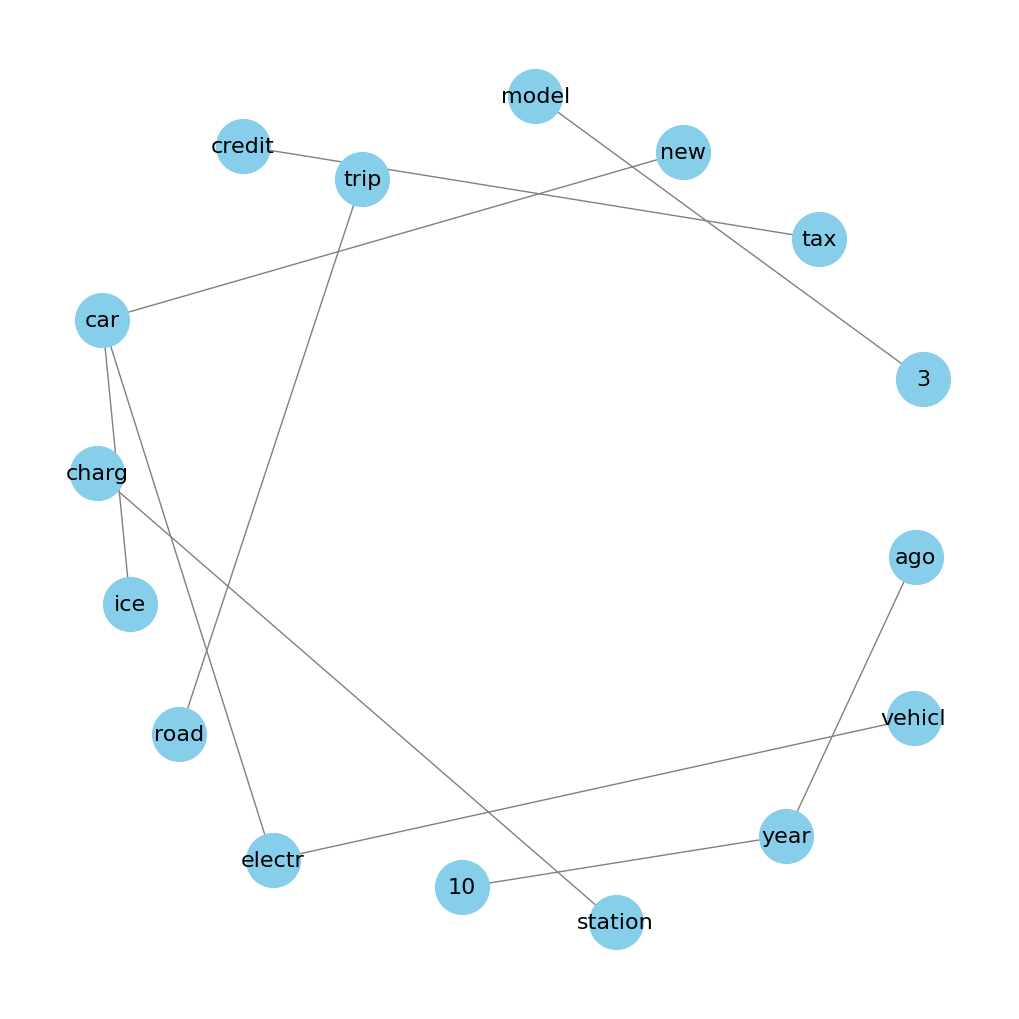

In [ ]:
G = nx.Graph()
for index, row in df_bigrams.iterrows():
    G.add_edge(row['Bigram'][0], row['Bigram'][1], weight=row['Score'])
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, font_size=16, node_color='skyblue', node_size=1500, edge_color='grey')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


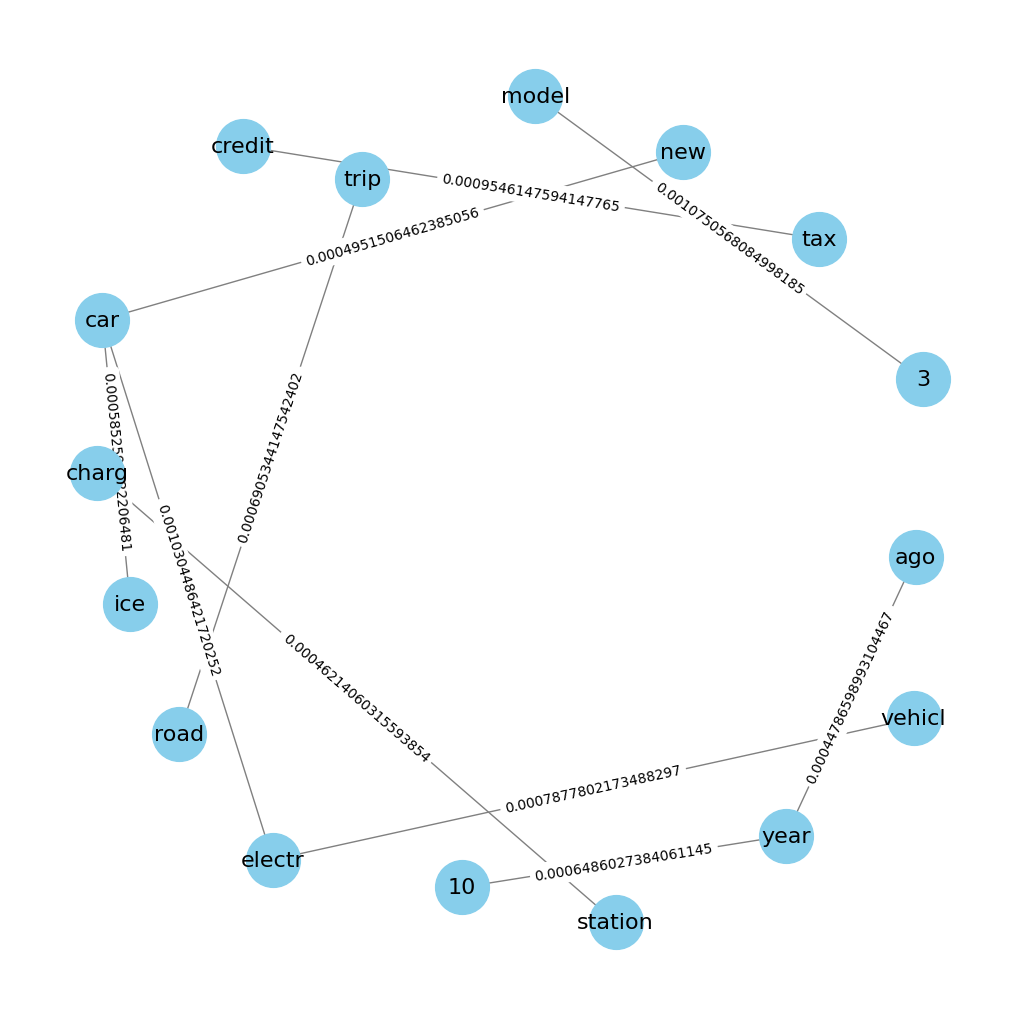

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new network graph
G = nx.Graph()

# Add edges to the graph (we use the bigram as the edge and the score as the weight)
for index, row in df_bigrams.iterrows():
    G.add_edge(row['Bigram'][0], row['Bigram'][1], weight=row['Score'])

# Draw the graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes, you might want to fix the seed for consistent layout
nx.draw(G, pos, with_labels=True, font_size=16, node_color='skyblue', node_size=1500, edge_color='grey')

# Add edge labels equal to weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()
